In [1]:
# Part 3
# The intendent audiences are water researchers

In [2]:
# Import the necessary Python libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
import numpy as np

In [3]:
# Read the data file
# NOTE: This assumes the data file is in the same folder as this script

df = pd.read_csv('Single-Family_ResidentialWaterUseDataSample.csv', header=12, sep=',',
                 index_col=0, parse_dates=True, infer_datetime_format=True, low_memory=False)

V_pulse        = 0.0087 #gallons
Delta_time     = 4.9    #seconds
df['Q_gpm']    = df['Pulse_Count']*V_pulse/Delta_time*60

In [4]:
# To Over Come Missing Time Steps in the Original Data Frame,
# Data Frame Will Be Resampled to '5 Seconds' Time Step

highfreq = df.resample('5S', base=0).mean()
highfreq = highfreq.fillna(0)

# Convert Series Analysis to Dataframe
highfreqdf = pd.DataFrame(data=highfreq, index=highfreq.index)

highfreqdf['Vol_g']    = highfreqdf['Q_gpm']*5/60
highfreqdf['Cumm_Vol'] = highfreqdf['Vol_g'].cumsum()

Tot_V = sum(highfreqdf['Vol_g'])

In [5]:
# Determine the divide between indoor events and outdoor events

Divide = 5   # the divide in gpm

highfreqdf['Indoor_Qgpm']  = highfreqdf['Q_gpm']
highfreqdf['Outdoor_Qgpm'] = highfreqdf['Q_gpm']

highfreqdf['Indoor_Qgpm'].values[highfreqdf['Indoor_Qgpm'] > Divide] = 0
highfreqdf['Outdoor_Qgpm'].values[highfreqdf['Outdoor_Qgpm'] <= Divide] = 0

highfreqdf['Indoor_Vol']     = highfreqdf['Indoor_Qgpm']*5/60
highfreqdf['Outdoor_Vol']    = highfreqdf['Outdoor_Qgpm']*5/60

Tot_V_indoor = sum(highfreqdf['Indoor_Vol'])
Tot_V_outdoor = sum(highfreqdf['Outdoor_Vol'])

print ('Total Volume is   ', round(Tot_V,2))
print ('Indoor Volume is  ', round(Tot_V_indoor,2))
print ('Outdoor Volume is ', round(Tot_V_outdoor,2))
print ('Indoor ratio is ', round(Tot_V_indoor/Tot_V,2), ', And Outdoor ratio is ', round(Tot_V_outdoor/Tot_V,2))

Total Volume is    82548.99
Indoor Volume is   32284.17
Outdoor Volume is  50264.82
Indoor ratio is  0.39 , And Outdoor ratio is  0.61


From 2018-07-07 00:00:00 to 2018-07-07 23:59:59

Mean Daily Flow is     1.96 gpm
Max High Freq Flow is 12.784 gpm
Min High Freq Flow is  0.213 gpm


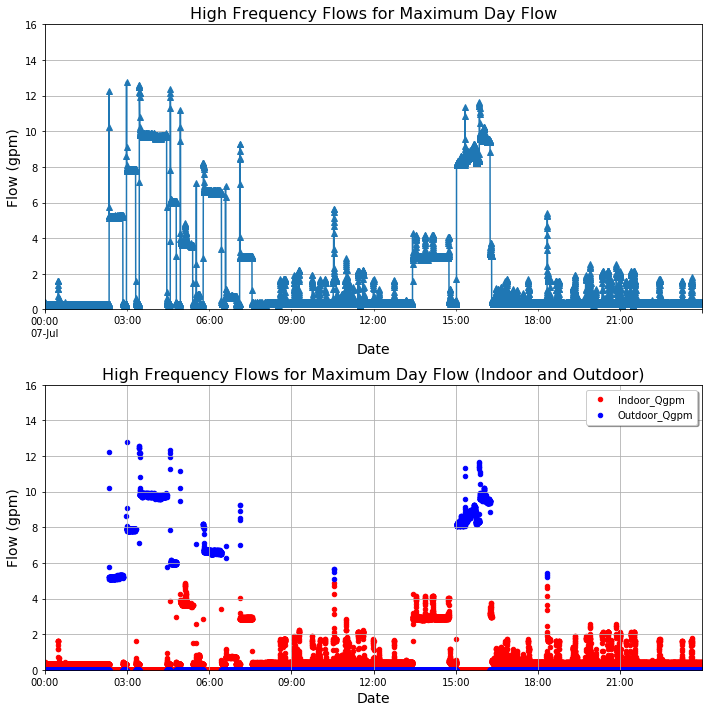


This Day Has NO Zero Reading
Water Is Running All Time
Which May BE an Error in the Measurment Device OR a problem is the water faucets

Maximum Daily Flow is due to irrigation From 3 to 6 am and From 3 - 4 pm

Done!


In [6]:
# Jump to Maximum Daily Flow

# Define Sub data frame
beginDate = '2018-07-07 00:00:00'
endDate   = '2018-07-07 23:59:59'
maxdaydf    = highfreqdf[beginDate:endDate]

print('From '+str(beginDate) + ' to '+ str(endDate))

mean = round(np.mean(maxdaydf['Q_gpm']),3)
print('\nMean Daily Flow is     ' + str(mean) + ' gpm')
max_highfreq = round(max(maxdaydf['Q_gpm']),3)
print('Max High Freq Flow is ' + str(max_highfreq) + ' gpm')
min_highfreq = round(min(maxdaydf['Q_gpm']),3)
print('Min High Freq Flow is  ' + str(min_highfreq) + ' gpm')

# Plot
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(2, 1, 1)
plt.title('High Frequency Flows for Maximum Day Flow', fontsize=16)

ax.set_ylim(0,16)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.set_xlim(pd.Timestamp(beginDate), pd.Timestamp(endDate))
ax.set_ylabel('Flow (gpm)', fontsize=14)


maxdaydf['Q_gpm'].plot(kind='line', use_index=True, style='-', marker='^', label='Q_gpm')

ax.set_xlabel('Date', fontsize=14)
ax.grid(True)
fig.tight_layout()

ax = fig.add_subplot(2, 1, 2)
plt.title('High Frequency Flows for Maximum Day Flow (Indoor and Outdoor)', fontsize=16)

ax.set_ylim(0,16)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.set_xlim(pd.Timestamp(beginDate), pd.Timestamp(endDate))
ax.set_ylabel('Flow (gpm)', fontsize=14)

plt.scatter(maxdaydf.index, maxdaydf['Indoor_Qgpm'], c='r', s=20)
plt.scatter(maxdaydf.index, maxdaydf['Outdoor_Qgpm'], c='b', s=20)

legend = ax.legend(loc='upper right', shadow=True)
ax.set_xlabel('Date', fontsize=14)
ax.grid(True)
fig.tight_layout()

plt.show()

print('\nThis Day Has NO Zero Reading')
print('Water Is Running All Time')
print('Which May BE an Error in the Measurment Device OR a problem is the water faucets')

print('\nMaximum Daily Flow is due to irrigation From 3 to 6 am and From 3 - 4 pm')

print ('\nDone!')

From 2018-06-30 04:00:00 to 2018-06-30 04:59:59


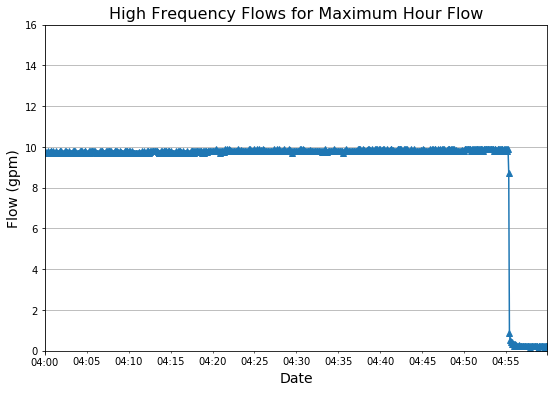

From 2018-06-30 03:00:00 to 2018-06-30 05:59:59


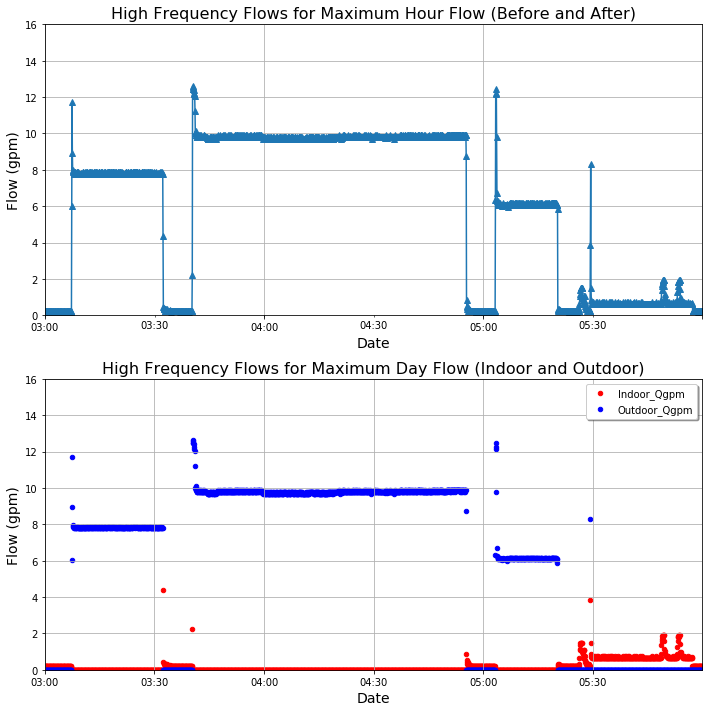

Max High Freq Flow is 12.624 gpm
Min High Freq Flow is 0.107 gpm

These 3 Hours Has NO Zero Reading
Water Is Running All Time
Which May BE an Error in the Measurment Device OR a problem is the water faucets

Maximum Hourly Flow is due to irrigation from 3 to 4 am

Done!


In [7]:
# Jump to Maximum Hourly Flow

# Define Sub data frame
beginDate = '2018-06-30 04:00:00'
endDate   = '2018-06-30 04:59:59'
maxhourdf =  highfreqdf[beginDate:endDate]

print('From '+str(beginDate) + ' to '+ str(endDate))

# Plot
fig = plt.figure(figsize=(9, 6))

ax = fig.add_subplot(1, 1, 1)

ax.set_ylim(0,16)
ax.set_ylabel('Flow (gpm)', fontsize=14)

maxhourdf['Q_gpm'].plot(kind='line', use_index=True, style='-', marker='^', label='Max')

ax.set_xlabel('Date', fontsize=14)
ax.grid(True)

# Plot tilte 
plt.title('High Frequency Flows for Maximum Hour Flow', fontsize=16)

plt.show()


# Define Sub data frame
beginDate = '2018-06-30 03:00:00'
endDate   = '2018-06-30 05:59:59'
maxhourdf   =  highfreqdf[beginDate:endDate]

print('From '+str(beginDate) + ' to '+ str(endDate))

# Plot
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(2, 1, 1)

ax.set_ylim(0,16)
ax.set_ylabel('Flow (gpm)', fontsize=14)

maxhourdf['Q_gpm'].plot(kind='line', use_index=True, style='-', marker='^', label='Max')

ax.set_xlabel('Date', fontsize=14)
ax.grid(True)
fig.tight_layout()

plt.title('High Frequency Flows for Maximum Hour Flow (Before and After)', fontsize=16)

# Second

ax = fig.add_subplot(2, 1, 2)
plt.title('High Frequency Flows for Maximum Day Flow (Indoor and Outdoor)', fontsize=16)

ax.set_ylim(0,16)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.set_xlim(pd.Timestamp(beginDate), pd.Timestamp(endDate))
ax.set_ylabel('Flow (gpm)', fontsize=14)

plt.scatter(maxhourdf.index, maxhourdf['Indoor_Qgpm'], c='r', s=20)
plt.scatter(maxhourdf.index, maxhourdf['Outdoor_Qgpm'], c='b', s=20)

legend = ax.legend(loc='upper right', shadow=True)
ax.set_xlabel('Date', fontsize=14)
ax.grid(True)
fig.tight_layout()

plt.show()

max_highfreq = round(max(maxhourdf['Q_gpm']),3)
print('Max High Freq Flow is ' + str(max_highfreq) + ' gpm')
min_highfreq = round(min(maxhourdf['Q_gpm']),3)
print('Min High Freq Flow is ' + str(min_highfreq) + ' gpm')

print('\nThese 3 Hours Has NO Zero Reading')
print('Water Is Running All Time')
print('Which May BE an Error in the Measurment Device OR a problem is the water faucets')

print('\nMaximum Hourly Flow is due to irrigation from 3 to 4 am')

print ('\nDone!')

From 2018-06-13 07:30:00 to 2018-06-13 08:59:59
Total Interval Is 90.0 min


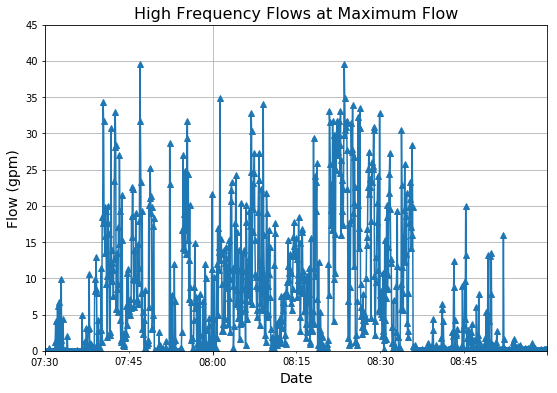

Mean High Freq Flow is 6.89 gpm
Max High Freq Flow is  39.629 gpm
Min High Freq Flow is  0.0 gpm

Total Volume Passed Trough 90.0 min Is 620.1 gallons
This Volume Is Nearly Impossible In Normal Water Usage
So, This may be error in the measuring device

OR, it may be mixed high extreme events for indoor and outdoor


In [8]:
# Jump to Maximum High Frequency Flow

# Define Sub data frame
beginDate = '2018-06-13 07:30:00'
endDate   = '2018-06-13 08:59:59'
maxflowdf   =  highfreqdf[beginDate:endDate]

print('From '+str(beginDate) + ' to '+ str(endDate))
time=len(maxflowdf)*5/60 #min
print('Total Interval Is '+str(time) + ' min')


# Plot
fig = plt.figure()
fig.set_size_inches(9, 6)

ax = fig.add_subplot(1, 1, 1)

ax.set_ylim(0,45)
ax.set_ylabel('Flow (gpm)', fontsize=14)

maxflowdf['Q_gpm'].plot(kind='line', use_index=True, style='-', marker='^', label='Max')

ax.set_xlabel('Date', fontsize=14)
ax.grid(True)

# Plot tilte and Save Image
plt.title('High Frequency Flows at Maximum Flow', fontsize=16)
plt.savefig('High_Frequency_Flows_Max_Flow')

plt.show()

mean_highfreq = round(np.mean(maxflowdf['Q_gpm']),3)
print('Mean High Freq Flow is ' + str(mean_highfreq) + ' gpm')
max_highfreq = round(max(maxflowdf['Q_gpm']),3)
print('Max High Freq Flow is  ' + str(max_highfreq) + ' gpm')
min_highfreq = round(min(maxflowdf['Q_gpm']),3)
print('Min High Freq Flow is  ' + str(min_highfreq) + ' gpm')

V=mean_highfreq*time
print('\nTotal Volume Passed Trough ' + str(time) + ' min Is '+ str(V) + ' gallons')
print('This Volume Is Nearly Impossible In Normal Water Usage')
print('So, This may be error in the measuring device')

print('\nOR, it may be mixed high extreme events for indoor and outdoor')